<a href="https://colab.research.google.com/github/ABNmmd/Employee-Sentiment-Analysis/blob/main/Final_LLM_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final LLM Assessment
## Task 1: Sentiment Labeling

In [3]:
# install pandas, transformers and torch to use haggingface models
#!pip install transformers torch pandas

In [4]:
# importing the required libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [5]:
# reading the data
df = pd.read_csv("test(in).csv")

In [6]:
# showing few liens of the data
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [7]:
# Load Pretrained Sentiment Model
# We're using the CardiffNLP RoBERTa model trained for sentiment classification
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [8]:
# Create Sentiment Analysis Pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


In [9]:
def label_sentiment(text):
    try:
        # Truncate to 512 tokens to avoid overflow
        result = sentiment_pipeline(text[:512])[0]['label']
        # Map model labels to sentiment categories
        if result == 'LABEL_0':
            return 'Negative'
        elif result == 'LABEL_1':
            return 'Neutral'
        elif result == 'LABEL_2':
            return 'Positive'
    except:
        return 'Unknown'

In [10]:
# Apply Sentiment Labeling to Each Message
df['sentiment'] = df['body'].astype(str).apply(label_sentiment)

In [11]:
# showing few liens of the data after analysis
df.head()

,Subject,body,date,from,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral


## Task 2: EDA

In [12]:
# installing requirment libreries
!pip install matplotlib seaborn

In [13]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
# Inspect the Data Structure
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n")
df.head()

Columns: ['Subject', 'body', 'date', 'from', 'sentiment']

Data Types:
 Subject      object
body         object
date         object
from         object
sentiment    object
dtype: object

Missing Values:
 Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64

Sample Data:



,Subject,body,date,from,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral


In [15]:
# Analyze Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()

<ipython-input-16-2786114252>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


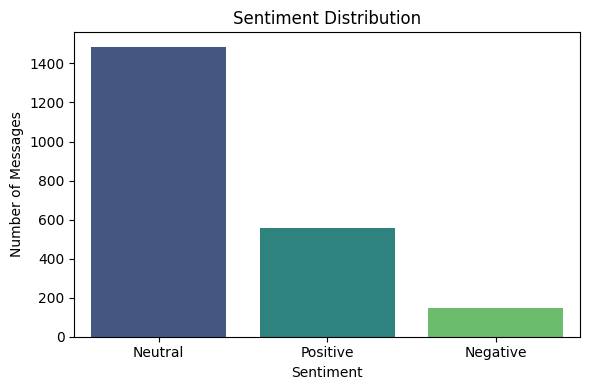

In [16]:
# Bar chart of sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.ylabel("Number of Messages")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

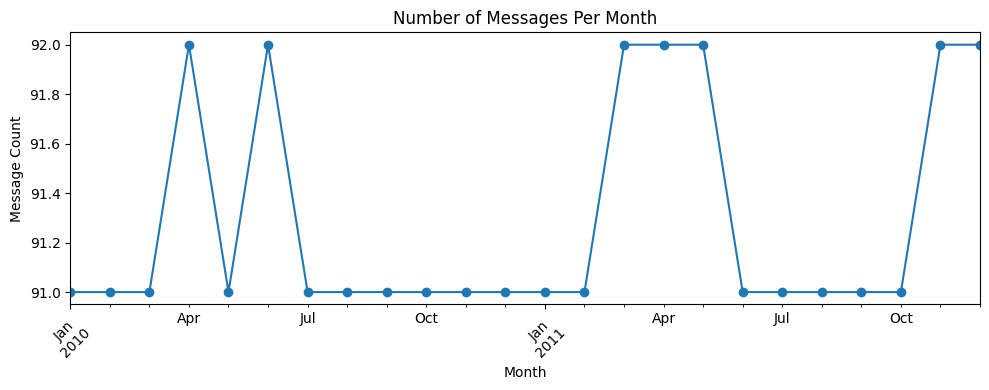

In [17]:
# Convert Date Column & Analyze by Time
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and year
df['month'] = df['date'].dt.to_period('M')

# Messages per month
monthly_counts = df.groupby('month').size()

# Line plot of message frequency over time
plt.figure(figsize=(10, 4))
monthly_counts.plot(kind='line', marker='o')
plt.title("Number of Messages Per Month")
plt.ylabel("Message Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

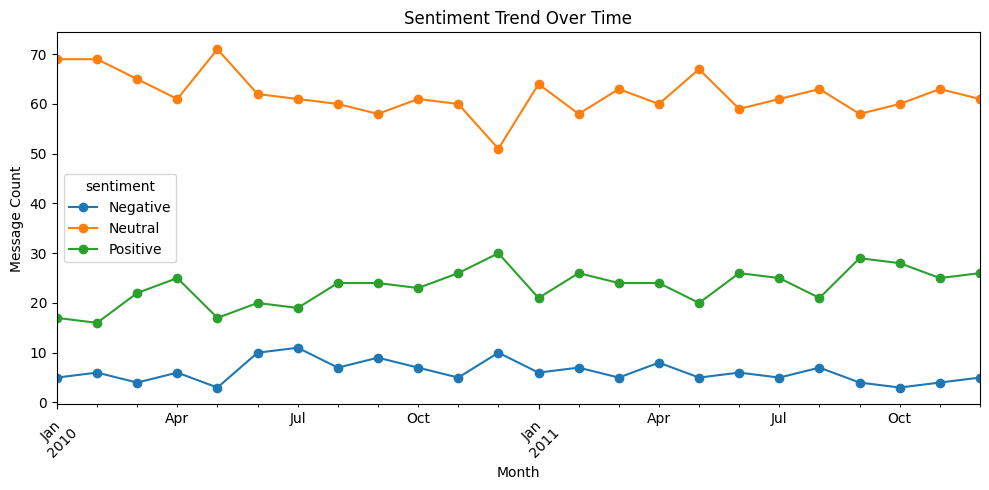

In [18]:
# Sentiment Trends Over Time
# Group by month and sentiment
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

# Line plot: sentiment trends
monthly_sentiment.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Sentiment Trend Over Time")
plt.ylabel("Message Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-19-3431545143>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_senders.index, x=top_senders.values, palette="coolwarm")


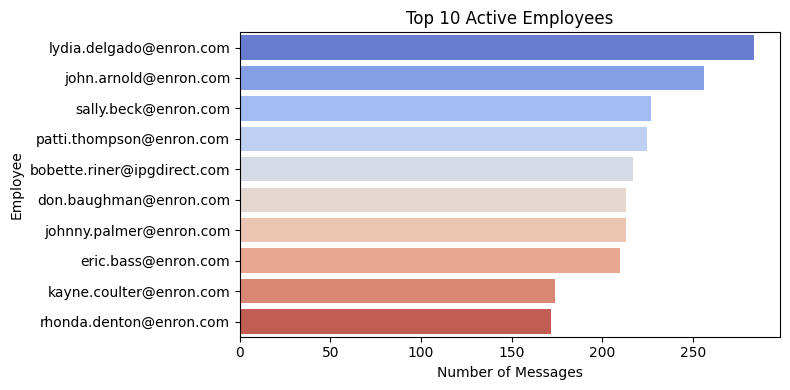

In [19]:
# Top Active Senders
# Top 10 most active employees
top_senders = df['from'].value_counts().head(10)

# Bar chart of top senders
plt.figure(figsize=(8, 4))
sns.barplot(y=top_senders.index, x=top_senders.values, palette="coolwarm")
plt.title("Top 10 Active Employees")
plt.xlabel("Number of Messages")
plt.ylabel("Employee")
plt.tight_layout()
plt.show()

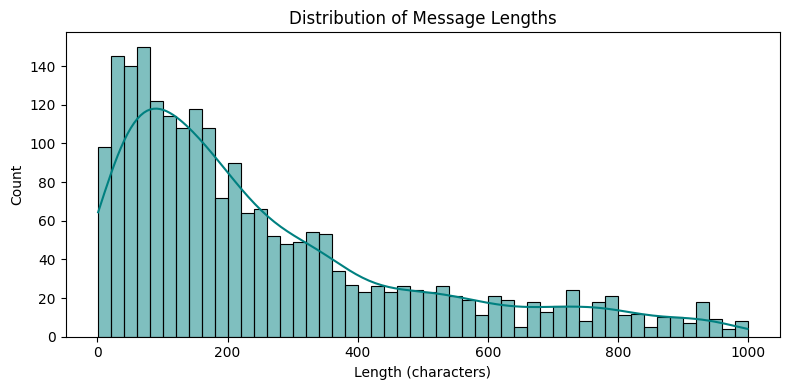

<ipython-input-20-2719095412>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='message_length', data=df, palette='Set2')


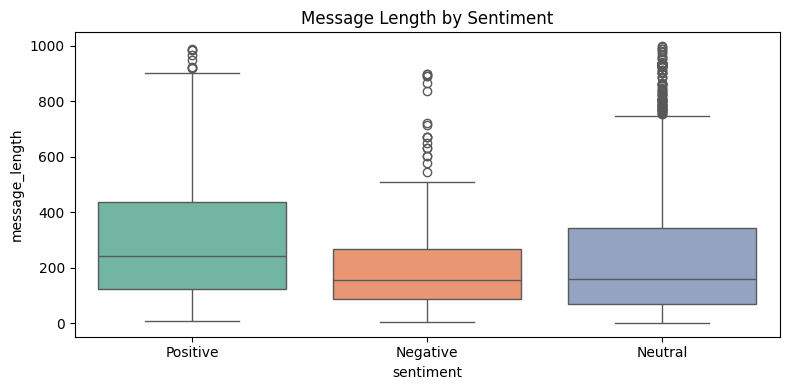

In [20]:
# Message Length Analysis
# Create message length feature
df['message_length'] = df['body'].astype(str).apply(len)

# Histogram of message lengths
plt.figure(figsize=(8, 4))
sns.histplot(df['message_length'], bins=50, kde=True, color='teal')
plt.title("Distribution of Message Lengths")
plt.xlabel("Length (characters)")
plt.tight_layout()
plt.show()

# Boxplot: Message length vs sentiment
plt.figure(figsize=(8, 4))
sns.boxplot(x='sentiment', y='message_length', data=df, palette='Set2')
plt.title("Message Length by Sentiment")
plt.tight_layout()
plt.show()

## Task 3: Employee Score Calculation

In [21]:
# Map sentiment to score
sentiment_score_map = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}
df['score'] = df['sentiment'].map(sentiment_score_map)

In [22]:
# Group by employee and month, then sum the scores
monthly_scores = df.groupby(['from', 'month'])['score'].sum().reset_index()

# Rename columns for clarity
monthly_scores.columns = ['employee_email', 'month', 'monthly_score']

# Display sample of monthly scores
print("✅ Sample Monthly Sentiment Scores:")
monthly_scores.head()

✅ Sample Monthly Sentiment Scores:


,employee_email,month,monthly_score
0,bobette.riner@ipgdirect.com,2010-01,0
1,bobette.riner@ipgdirect.com,2010-02,4
2,bobette.riner@ipgdirect.com,2010-03,1
3,bobette.riner@ipgdirect.com,2010-04,1
4,bobette.riner@ipgdirect.com,2010-05,2


## Task 4: Employee Ranking

### How Rankings Were Determined
To identify high- and low-performing employees based on sentiment, we calculated monthly sentiment scores as outlined in Task 3. We then sorted the data first by month, then by score (descending for positive rankings and ascending for negative ones), and finally alphabetically by employee email in case of tie scores. The top three employees from each sorted group were selected to form the final monthly rankings.

In [23]:
# Get Top 3 Positive Employees per Month
top_positive = (
    monthly_scores
    .sort_values(['month', 'monthly_score', 'employee_email'], ascending=[True, False, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_positive['rank_type'] = 'Top Positive'

In [24]:
# Get Top 3 Negative Employees per Month
top_negative = (
    monthly_scores
    .sort_values(['month', 'monthly_score', 'employee_email'], ascending=[True, True, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_negative['rank_type'] = 'Top Negative'

In [25]:
# Step 3: Combine Rankings
employee_rankings = pd.concat([top_positive, top_negative]).sort_values(['month', 'rank_type'])

# Show Sample Rankings
print("✅ Sample Employee Rankings:")
employee_rankings.head(10)

✅ Sample Employee Rankings:


,employee_email,month,monthly_score,rank_type
0,sally.beck@enron.com,2010-01,-1,Top Negative
1,bobette.riner@ipgdirect.com,2010-01,0,Top Negative
2,john.arnold@enron.com,2010-01,0,Top Negative
0,eric.bass@enron.com,2010-01,3,Top Positive
1,patti.thompson@enron.com,2010-01,3,Top Positive
2,don.baughman@enron.com,2010-01,2,Top Positive
3,kayne.coulter@enron.com,2010-02,-1,Top Negative
4,sally.beck@enron.com,2010-02,-1,Top Negative
5,john.arnold@enron.com,2010-02,0,Top Negative
3,bobette.riner@ipgdirect.com,2010-02,4,Top Positive


## Task 5: Flight Risk Identification

In [26]:
# Filter only negative messages
negatives = df[df['sentiment'] == 'Negative'].copy()

In [27]:
# Create a set to store flight-risk employees
flight_risks = set()

In [28]:
from datetime import timedelta
# Group by sender and scan for 30-day windows
for employee, group in negatives.groupby('from'):
    dates = group['date'].dropna().sort_values().tolist()

    for i in range(len(dates)):
        count = 1
        for j in range(i+1, len(dates)):
            if (dates[j] - dates[i]) <= timedelta(days=30):
                count += 1
                if count >= 4:
                    flight_risks.add(employee)
                    break  # No need to continue for this employee
            else:
                break

In [29]:
# Output the flight-risk employee list
flight_risk_list = pd.DataFrame(list(flight_risks), columns=["employee_email"])
print("✅ Employees at Flight Risk:\n")
flight_risk_list.head()

✅ Employees at Flight Risk:



,employee_email
0,sally.beck@enron.com
1,don.baughman@enron.com
2,john.arnold@enron.com
3,bobette.riner@ipgdirect.com


## Task 6: Predictive Modeling

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
# Feature Engineering
df['message_length'] = df['body'].astype(str).apply(len)
df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))

In [32]:
# Aggregate features per employee per month
# agg = df.groupby(['from', 'month']).agg(
#     message_count=('body', 'count'),
#     avg_message_length=('message_length', 'mean'),
#     avg_word_count=('word_count', 'mean'),
#     monthly_score=('score', 'sum')  # Target variable
# ).reset_index()

In [33]:
# New Feature Engineering
# Add positive/negative message flags
df['is_positive'] = (df['sentiment'] == 'Positive').astype(int)
df['is_negative'] = (df['sentiment'] == 'Negative').astype(int)

# Group by employee & month with new aggregated features
agg = df.groupby(['from', 'month']).agg(
    message_count=('body', 'count'),
    avg_message_length=('message_length', 'mean'),
    avg_word_count=('word_count', 'mean'),
    num_positive_msgs=('is_positive', 'sum'),
    num_negative_msgs=('is_negative', 'sum'),
    std_message_length=('message_length', 'std'),
    monthly_score=('score', 'sum')
).reset_index()

# Replace NaN std values (for single-message months) with 0
agg['std_message_length'] = agg['std_message_length'].fillna(0)

# Compute ratio of negative messages (avoid div by 0)
agg['negative_msg_ratio'] = agg['num_negative_msgs'] / agg['message_count']

# Optional: Add prior month score as a lag feature
agg['prior_month_score'] = agg.groupby('from')['monthly_score'].shift(1).fillna(0)


In [34]:
# Prepare Features and Target
# features = ['message_count', 'avg_message_length', 'avg_word_count']
# X = agg[features]
# y = agg['monthly_score']

In [35]:
# 🚀 Updated Features for Regression
features = [
    'message_count',
    'avg_message_length',
    'avg_word_count',
    'num_positive_msgs',
    'num_negative_msgs',
    'std_message_length',
    'negative_msg_ratio',
    'prior_month_score'
]

X = agg[features]
y = agg['monthly_score']


In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

✅ Model Evaluation:
Mean Squared Error (MSE): 3.255181544298032e-28
R-squared (R²): 1.0


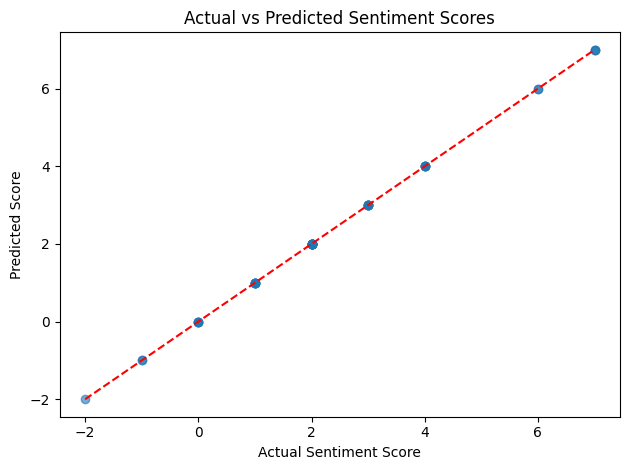

In [39]:
# Visualization
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.tight_layout()
plt.show()

In [40]:
# Feature Coefficients (optional)
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(coefficients)


Feature Importance:
              Feature   Coefficient
0       message_count  8.352177e-17
1  avg_message_length  4.510281e-17
2      avg_word_count  5.914323e-16
3   num_positive_msgs  1.000000e+00
4   num_negative_msgs -1.000000e+00
5  std_message_length -1.682682e-16
6  negative_msg_ratio -2.444293e-15
7   prior_month_score  1.203261e-16
